### Importación de datos



In [17]:
import pandas as pd

class BaseAnalisisTiendasAluraLATAM:
    url = ["https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
            "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
            "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
            "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"]

    tienda = [None] * len(url)

    def __init__(self):
      self.carga_datos()

    def carga_datos(self):
      for i in range(len(self.url)):
        self.tienda[i] = pd.read_csv(self.url[i])

    def get_datos_tienda(self, id_tienda):
      return self.tienda[id_tienda - 1]

    def get_total_tiendas(self):
      return len(self.tienda)

obj_base = BaseAnalisisTiendasAluraLATAM()

obj_base.get_datos_tienda(1).head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [11]:
class AnalisisDeFacturacion(BaseAnalisisTiendasAluraLATAM):
    def __init__(self):
      super().__init__()

    def calc_ingreso_por_tienda(self, id_tienda):
      return self.get_datos_tienda(id_tienda)['Precio'].sum()

    def calc_ingreso_todas_tiendas(self):
      lista = [None] * self.get_total_tiendas()

      for i in range(self.get_total_tiendas()):
        lista[i] = self.calc_ingreso_por_tienda(i + 1)

      return lista

obj_analisis_fact = AnalisisDeFacturacion()

lista_calc = obj_analisis_fact.calc_ingreso_todas_tiendas()

for i in range(len(lista_calc)):
    print(f"Ingreso total tienda {i + 1}: {int(lista_calc[i]):,}".replace(",", "."))


Ingreso total tienda 1: 1.150.880.400
Ingreso total tienda 2: 1.116.343.500
Ingreso total tienda 3: 1.098.019.600
Ingreso total tienda 4: 1.038.375.700


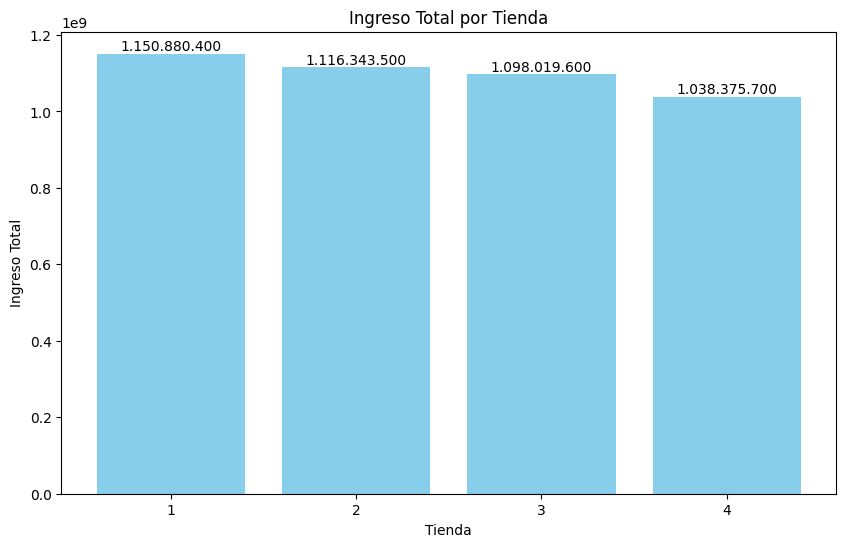

In [40]:
import matplotlib.pyplot as plt

# Datos de ingreso por tienda (reemplaza con tus datos reales)
tiendas = list(range(1, len(lista_calc) + 1))
ingresos = lista_calc  # lista_calc ya contiene los ingresos de cada tienda

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.bar(tiendas, ingresos, color='skyblue')

# Personalizar el gráfico
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")
plt.title("Ingreso Total por Tienda")
plt.xticks(tiendas)  # Mostrar las etiquetas del eje x para cada tienda

# Agregar etiquetas de valor a cada barra
for i, ingreso in enumerate(ingresos):
    plt.text(i + 1, ingreso, f"{int(ingreso):,}".replace(",", "."), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


# 2. Ventas por categoría

In [32]:
class VentasPorCategoria(BaseAnalisisTiendasAluraLATAM):
  def __init__(self):
      super().__init__()

  def ventas_categoria(self, id_tienda):
    df = self.get_datos_tienda(id_tienda)
    ventas_cat = df.groupby('Categoría del Producto') \
                            ['Cantidad de cuotas'].sum()
    return ventas_cat

  def top_categorias(self, id_tienda, n=5):
    ventas_cat = self.ventas_categoria(id_tienda)
    return ventas_cat.nlargest(n)

obj_ventas_cat = VentasPorCategoria()

for i in range(1, obj_ventas_cat.get_total_tiendas() + 1):
  print(f"\n--- Tienda {i} ---")
  print(obj_ventas_cat.top_categorias(i))



--- Tienda 1 ---
Categoría del Producto
Muebles                 1446
Electrónicos            1341
Electrodomésticos        906
Juguetes                 872
Deportes y diversión     796
Name: Cantidad de cuotas, dtype: int64

--- Tienda 2 ---
Categoría del Producto
Electrónicos            1333
Muebles                 1265
Electrodomésticos        890
Juguetes                 876
Deportes y diversión     720
Name: Cantidad de cuotas, dtype: int64

--- Tienda 3 ---
Categoría del Producto
Muebles                 1408
Electrónicos            1262
Juguetes                 937
Electrodomésticos        882
Deportes y diversión     873
Name: Cantidad de cuotas, dtype: int64

--- Tienda 4 ---
Categoría del Producto
Muebles                 1392
Electrónicos            1293
Juguetes                 921
Deportes y diversión     786
Electrodomésticos        756
Name: Cantidad de cuotas, dtype: int64


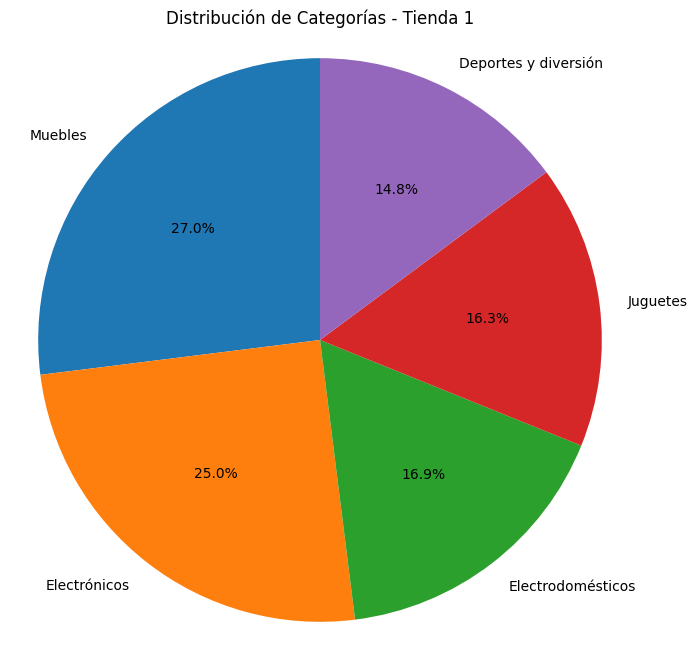

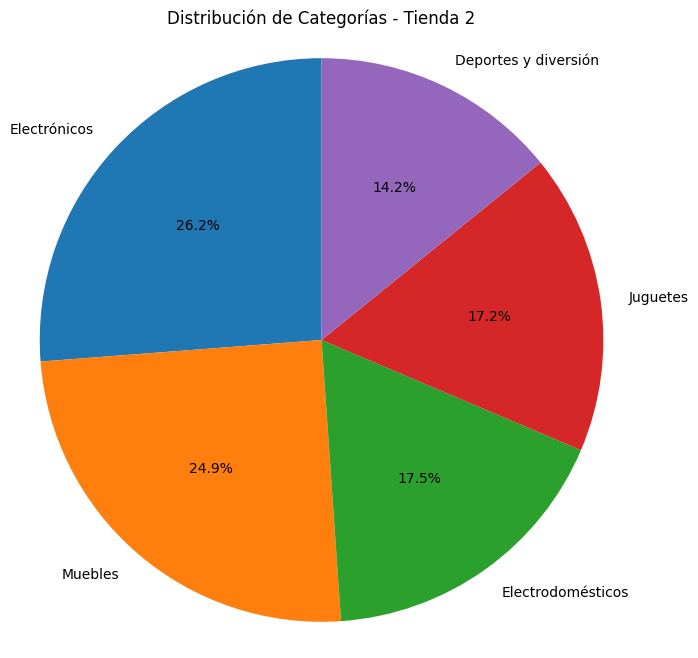

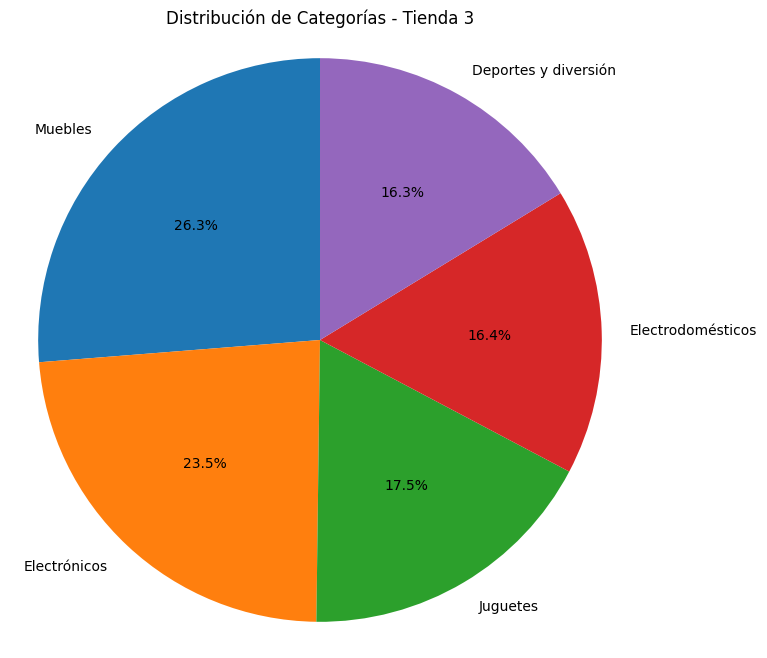

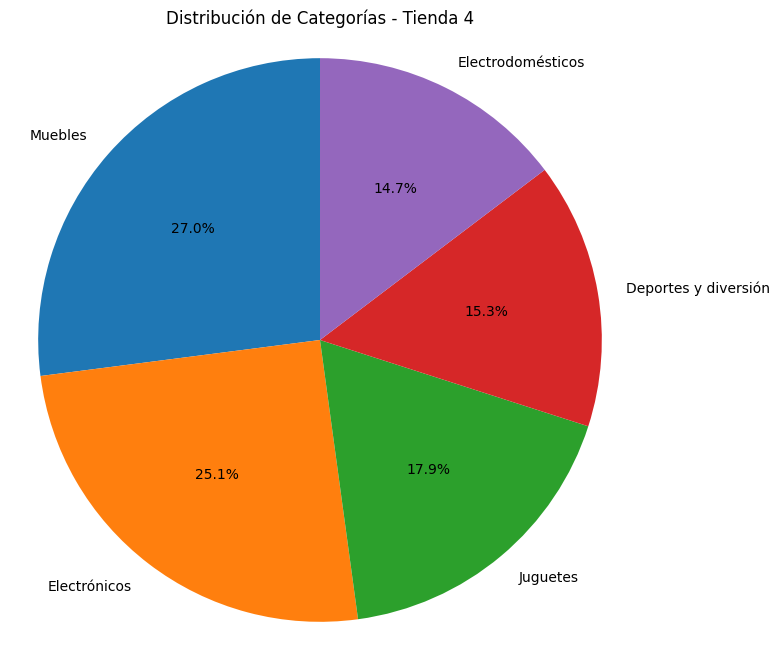

In [41]:
import matplotlib.pyplot as plt

for i in range(1, obj_ventas_cat.get_total_tiendas() + 1):
    ventas_cat = obj_ventas_cat.top_categorias(i)

    plt.figure(figsize=(8, 8))  # Ajusta el tamaño de la figura si es necesario
    plt.pie(ventas_cat, labels=ventas_cat.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribución de Categorías - Tienda {i}")
    plt.axis('equal')  # Asegura que el gráfico sea un círculo
    plt.show()


# 3. Calificación promedio de la tienda


In [33]:
class CalificacionPromedioTienda(BaseAnalisisTiendasAluraLATAM):
    rotulo_columna = 'Calificación'

    def __init__(self):
        super().__init__()

    def calificacion_promedio(self, id_tienda):
        df = self.get_datos_tienda(id_tienda)

        if 'Calificación' not in df.columns:
            print(f"Error: La columna '{self.rotulo_columna}' no existe en la tienda {id_tienda}.")
            return None

        try:
          calificacion_promedio = df[self.rotulo_columna].mean()
          return calificacion_promedio

        except TypeError:
          print(f"Error: La columna '{self.rotulo_columna}' de la tienda {id_tienda} no contiene datos numéricos.")
          return None

obj_calificacion = CalificacionPromedioTienda()

for i in range(1, obj_calificacion.get_total_tiendas() + 1):
    calificacion = obj_calificacion.calificacion_promedio(i)
    if calificacion is not None:
        print(f"Calificación promedio de la tienda {i}: {calificacion:.2f}")


Calificación promedio de la tienda 1: 3.98
Calificación promedio de la tienda 2: 4.04
Calificación promedio de la tienda 3: 4.05
Calificación promedio de la tienda 4: 4.00


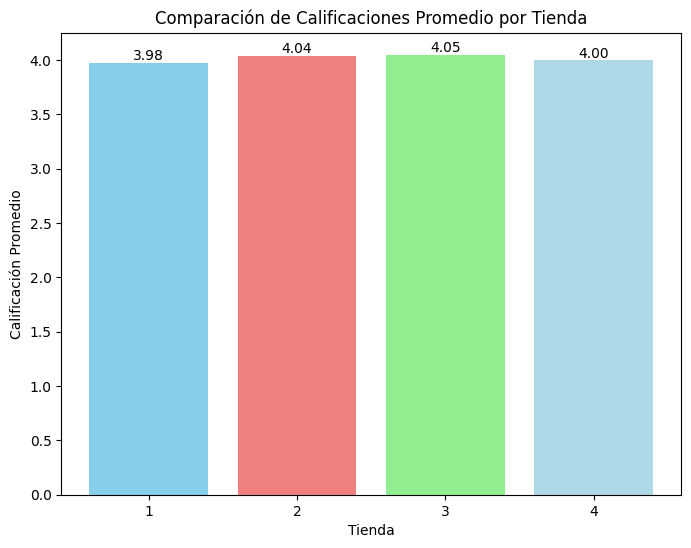

In [45]:
import matplotlib.pyplot as plt

# Datos de calificación promedio de cada tienda (reemplaza con tus datos reales)
tiendas = list(range(1, obj_calificacion.get_total_tiendas() + 1))
calificaciones = [obj_calificacion.calificacion_promedio(i) for i in tiendas]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(tiendas, calificaciones, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])

# Personalizar el gráfico
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.title("Comparación de Calificaciones Promedio por Tienda")
plt.xticks(tiendas)

# Agregar etiquetas de valor encima de cada barra
for i, calificacion in enumerate(calificaciones):
    plt.text(i + 1, calificacion, f"{calificacion:.2f}", ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


# 4. Productos más y menos vendidos

In [48]:
class ProductosVendidos(BaseAnalisisTiendasAluraLATAM):
    def __init__(self):
        super().__init__()

    def productos_vendidos(self, id_tienda):
        df = self.get_datos_tienda(id_tienda)
        ventas_producto = df.groupby('Producto') \
                            ['Cantidad de cuotas'].sum()
        return ventas_producto

obj_prods_vendidos = ProductosVendidos()

for i in range(1, obj_prods_vendidos.get_total_tiendas() + 1):
    mas_vendido = obj_prods_vendidos.productos_vendidos(i).idxmax()
    menos_vendido = obj_prods_vendidos.productos_vendidos(i).idxmin()

    print(f"Tienda {i}:")
    print(f"  Producto más vendido: {mas_vendido}")
    print(f"  Producto menos vendido: {menos_vendido}")


Tienda 1:
  Producto más vendido: Secadora de ropa
  Producto menos vendido: Celular ABXY
Tienda 2:
  Producto más vendido: Iniciando en programación
  Producto menos vendido: Mesa de comedor
Tienda 3:
  Producto más vendido: Bicicleta
  Producto menos vendido: TV LED UHD 4K
Tienda 4:
  Producto más vendido: Dashboards con Power BI
  Producto menos vendido: Armario


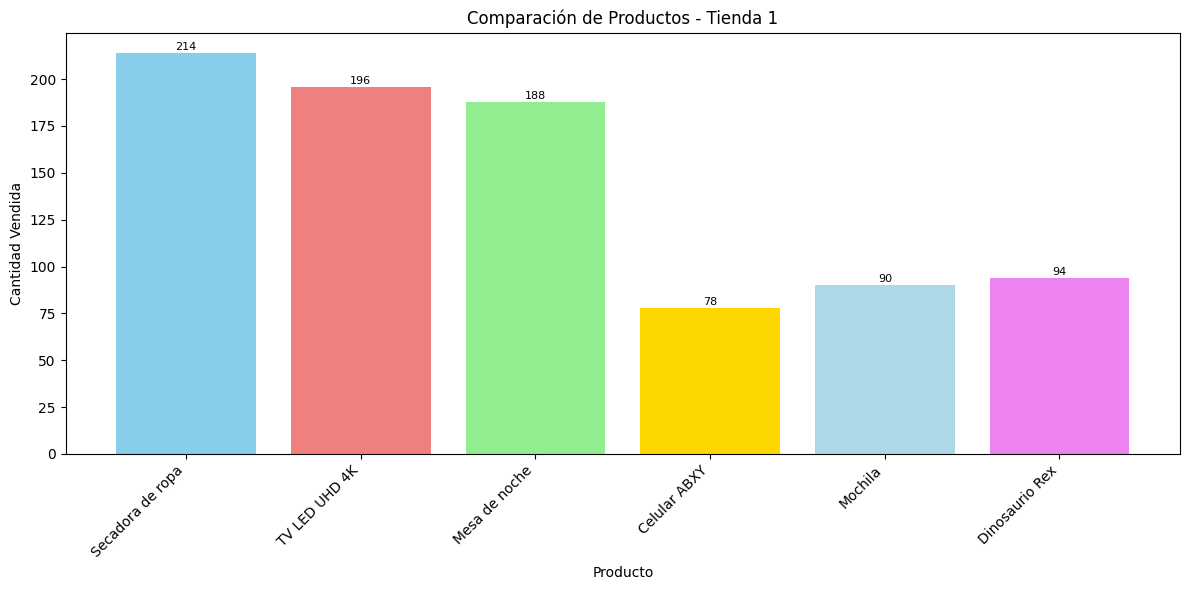

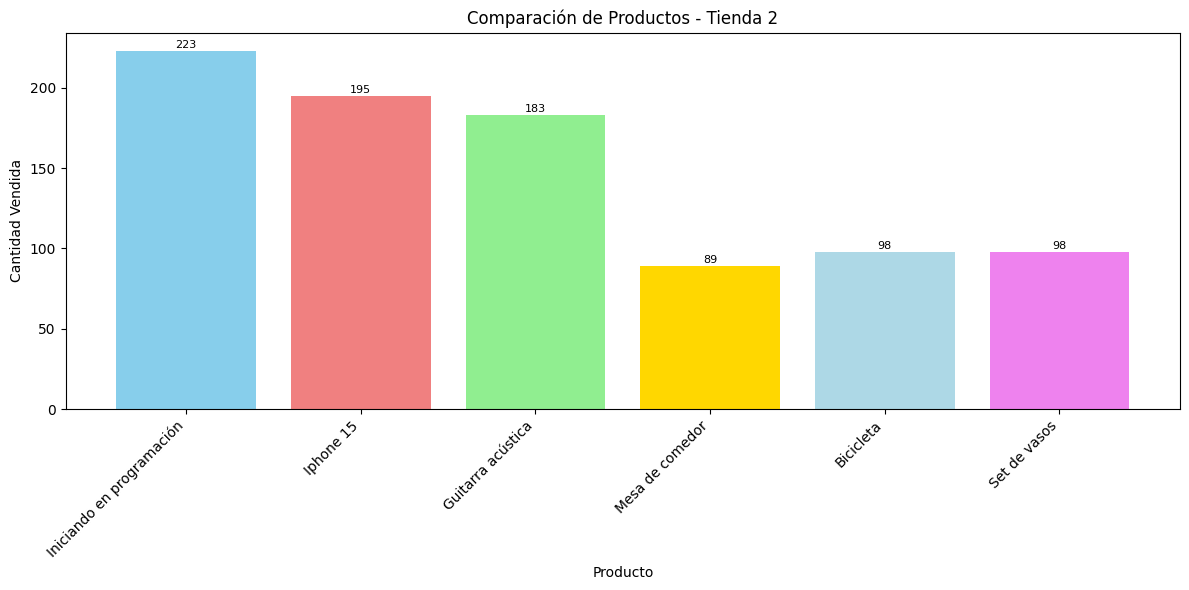

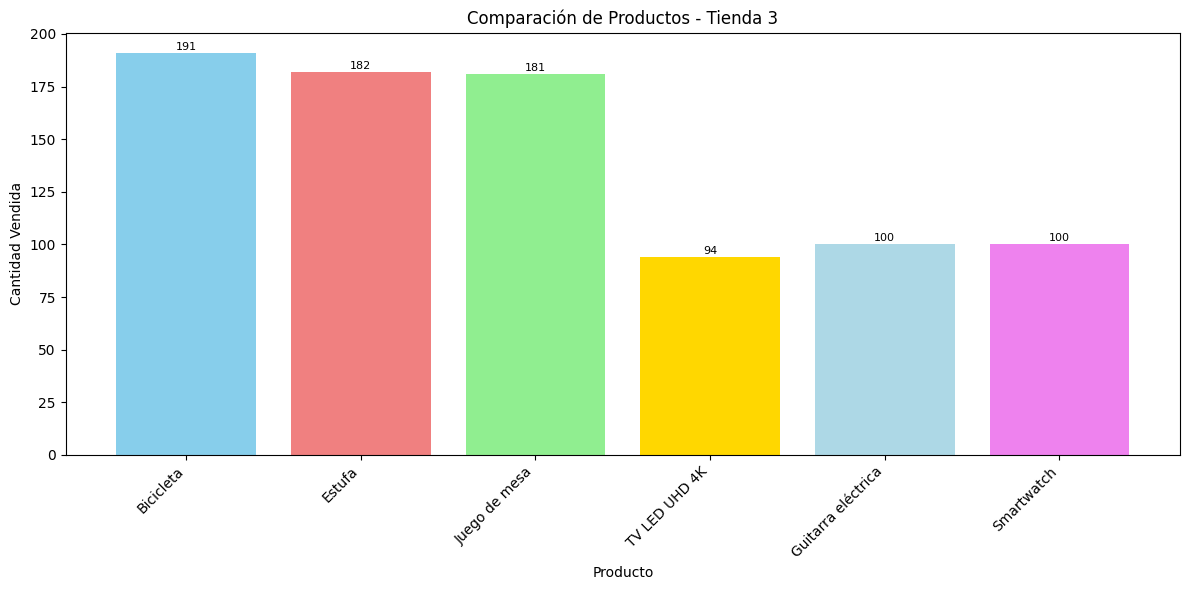

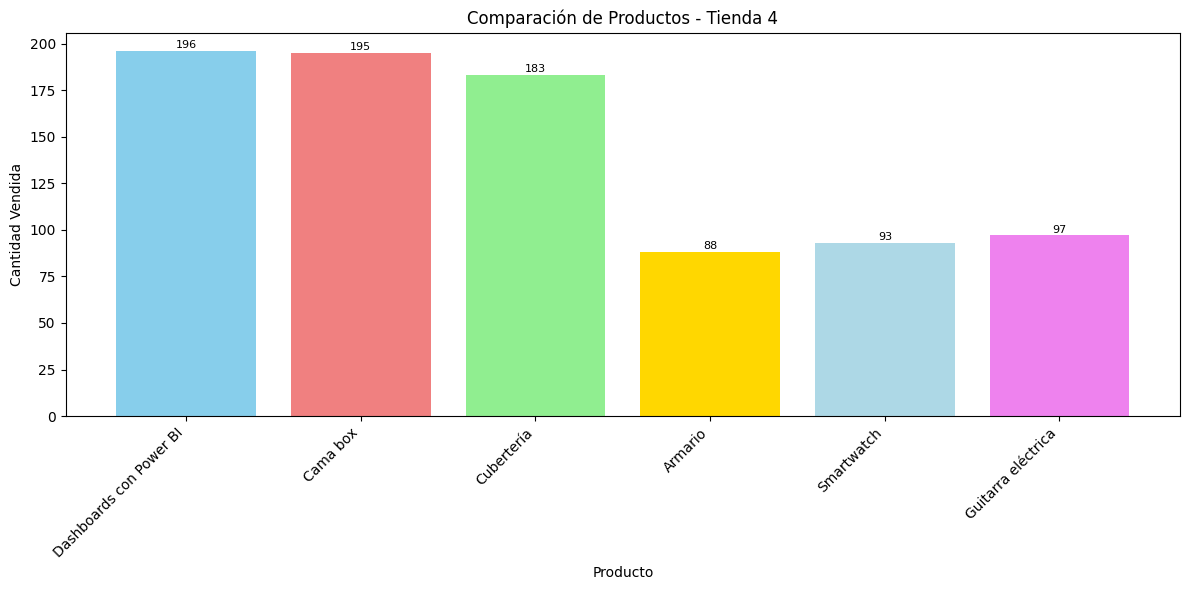

In [51]:
import matplotlib.pyplot as plt
import numpy as np

class ProductosMasMenosVendidos(ProductosVendidos):
    def __init__(self):
        super().__init__()

    def top_productos(self, id_tienda, top_n=3):
        ventas_producto = self.productos_vendidos(id_tienda)
        top_productos = ventas_producto.nlargest(top_n)
        bottom_productos = ventas_producto.nsmallest(top_n)
        return top_productos, bottom_productos

obj_top_bottom = ProductosMasMenosVendidos()

for i in range(1, obj_top_bottom.get_total_tiendas() + 1):
    top_productos, bottom_productos = obj_top_bottom.top_productos(i)

    productos = np.concatenate([top_productos.index, bottom_productos.index])
    ventas = np.concatenate([top_productos.values, bottom_productos.values])

    colores = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightblue', 'violet']
    colores = colores[:len(productos)]

    plt.figure(figsize=(12, 6))
    plt.bar(productos, ventas, color=colores)
    plt.xlabel("Producto")
    plt.ylabel("Cantidad Vendida")
    plt.title(f"Comparación de Productos - Tienda {i}")
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
    plt.tight_layout() # Ajustar espaciado

    for j, v in enumerate(ventas):
        plt.text(j, v + 0.5, str(int(v)), ha='center', va='bottom', fontsize=8)

    plt.show()


# 5. Envío promedio por tienda

In [38]:
class CostoEnvioPromedio(BaseAnalisisTiendasAluraLATAM):
    rotulo_columna = 'Costo de envío'

    def __init__(self):
        super().__init__()

    def costo_envio_promedio(self, id_tienda):
        df = self.get_datos_tienda(id_tienda)

        if self.rotulo_columna not in df.columns:
            print(f"Error: La columna '{self.rotulo_columna}' no existe en la tienda {id_tienda}.")
            return None

        try:
          costo_envio_promedio = df[self.rotulo_columna].mean()
          return costo_envio_promedio

        except TypeError:
          print(f"Error: La columna '{self.rotulo_columna}' de la tienda {id_tienda} no contiene datos numéricos.")
          return None

obj_costo_envio = CostoEnvioPromedio()

for i in range(1, obj_costo_envio.get_total_tiendas() + 1):
    costo_promedio = obj_costo_envio.costo_envio_promedio(i)
    if costo_promedio is not None:
        print(f"Costo de envío promedio de la tienda {i}: {costo_promedio:.2f}")


Costo de envío promedio de la tienda 1: 26018.61
Costo de envío promedio de la tienda 2: 25216.24
Costo de envío promedio de la tienda 3: 24805.68
Costo de envío promedio de la tienda 4: 23459.46


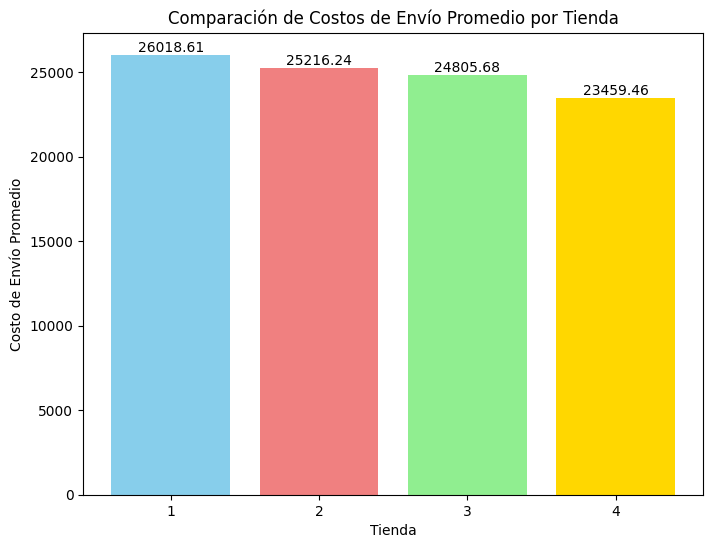

In [52]:
import matplotlib.pyplot as plt

# Datos de costo de envío promedio de cada tienda (reemplaza con tus datos reales)
tiendas = list(range(1, obj_costo_envio.get_total_tiendas() + 1))
costos_envio = [obj_costo_envio.costo_envio_promedio(i) for i in tiendas]

# Crear el gráfico de barras con colores
colores = ['skyblue', 'lightcoral', 'lightgreen', 'gold']  # Agrega más colores si tienes más tiendas
plt.figure(figsize=(8, 6))
plt.bar(tiendas, costos_envio, color=colores[:len(tiendas)])

# Personalizar el gráfico
plt.xlabel("Tienda")
plt.ylabel("Costo de Envío Promedio")
plt.title("Comparación de Costos de Envío Promedio por Tienda")
plt.xticks(tiendas)

# Agregar etiquetas de valor encima de cada barra
for i, costo in enumerate(costos_envio):
    plt.text(i + 1, costo, f"{costo:.2f}", ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


# Informe final

**Introducción:**

El presente informe tiene como objetivo analizar el rendimiento de cuatro tiendas propiedad del Sr. Juan, con el fin de determinar cuál de ellas sería la más adecuada para vender, basándonos en diversos indicadores clave de rendimiento (KPIs).  La decisión se fundamentará en un análisis objetivo de los ingresos totales, las categorías de productos, las calificaciones de los clientes, los productos más y menos vendidos, y los costos de envío promedio.  El objetivo es identificar la tienda con el menor potencial de crecimiento y/o con mayores desafíos operativos.

**Desarrollo:**

Para facilitar la comprensión y el análisis, los datos proporcionados se han organizado y visualizado mediante gráficos y tablas.

**1. Ingresos Totales:**

Como se observa en la siguiente tabla, la tienda 4 tiene los ingresos totales más bajos:

| Tienda | Ingresos Totales |
|---|---|
| Tienda 1 | 1.150.880.400 |
| Tienda 2 | 1.116.343.500 |
| Tienda 3 | 1.098.019.600 |
| **Tienda 4** | **1.038.375.700** |

**2. Categorías de Productos Más y Menos Vendidas:**

Las tablas a continuación muestran las unidades vendidas por categoría para cada tienda. Aunque la diferencia entre las tiendas no es drástica, podemos identificar algunas tendencias.

**Tienda 1**

| Categoría del Producto   | Unidades Vendidas |
|-------------------------|-------------------|
| Muebles                  | 1446              |
| Electrónicos             | 1341              |
| Electrodomésticos         | 906               |
| Juguetes                 | 872               |
| Deportes y diversión      | 796               |

**Tienda 2**

| Categoría del Producto   | Unidades Vendidas |
|-------------------------|-------------------|
| Electrónicos             | 1333              |
| Muebles                  | 1265              |
| Electrodomésticos         | 890               |
| Juguetes                 | 876               |
| Deportes y diversión      | 720               |

**Tienda 3**

| Categoría del Producto   | Unidades Vendidas |
|-------------------------|-------------------|
| Muebles                  | 1408              |
| Electrónicos             | 1262              |
| Juguetes                 | 937               |
| Electrodomésticos         | 882               |
| Deportes y diversión      | 873               |

**Tienda 4**

| Categoría del Producto   | Unidades Vendidas |
|-------------------------|-------------------|
| Muebles                  | 1392              |
| Electrónicos             | 1293              |
| Juguetes                 | 921               |
| Deportes y diversión      | 786               |
| Electrodomésticos         | 756               |

En todas las tiendas, Muebles y Electrónicos son las categorías más vendidas.  Sin embargo, **Tienda 4 destaca por tener la menor cantidad de ventas en Electrodomésticos** en comparación con las otras tiendas.  Aunque Deportes y diversión también tiene bajas ventas, esto es consistente con las demás tiendas.

**3. Calificación Promedio de los Clientes:**

| Tienda | Calificación Promedio |
|---|---|
| Tienda 1 | 3.98 |
| Tienda 2 | 4.04 |
| Tienda 3 | 4.05 |
| Tienda 4 | 4.00 |

Las calificaciones promedio son relativamente similares en todas las tiendas, indicando un nivel de satisfacción del cliente comparable.  Sin embargo, **la Tienda 1 tiene la calificación promedio más baja (3.98).**

**4. Productos Más y Menos Vendidos:**

| Tienda | Producto Más Vendido | Producto Menos Vendido |
|---|---|---|
| Tienda 1 | Secadora de ropa | Celular ABXY |
| Tienda 2 | Iniciando en programación | Mesa de comedor |
| Tienda 3 | Bicicleta | TV LED UHD 4K |
| Tienda 4 | Dashboards con Power BI | Armario |

Analizando los productos menos vendidos, observamos que en la **Tienda 4, el producto menos vendido es un "Armario"**, que se relaciona con la categoría de Muebles. Siendo los Muebles la categoría más vendida, que un Armario sea el producto menos vendido puede indicar problemas con el inventario, marketing o precio de ese producto en específico, que no son comunes en las otras tiendas.

**5. Costo de Envío Promedio:**

| Tienda | Costo de Envío Promedio |
|---|---|
| Tienda 1 | 26018.61 |
| Tienda 2 | 25216.24 |
| Tienda 3 | 24805.68 |
| **Tienda 4** | **23459.46** |

La **Tienda 4 tiene el costo de envío promedio más bajo**, lo cual es un punto a su favor, ya que indica una mayor eficiencia en la logística o la ubicación estratégica de los almacenes.

**Conclusión y Recomendación:**

Considerando todos los factores analizados, **recomiendo al Sr. Juan vender la Tienda 4**.  Si bien tiene el costo de envío promedio más bajo, este beneficio no compensa sus deficiencias en comparación con las otras tiendas. La justificación se basa en los siguientes puntos:

*   **Menores Ingresos Totales:** La Tienda 4 tiene los ingresos totales más bajos de todas las tiendas, lo que indica un menor rendimiento general.
*   **Debilidad en la Categoría de Electrodomésticos:**  Tiene la menor cantidad de ventas en la categoría de Electrodomésticos, mostrando una posible falta de enfoque o estrategia en esta área.
*   **Producto Menos Vendido Relacionado a la Categoría más Vendida:** El hecho de que el producto menos vendido sea un armario (de la categoría Muebles, la más vendida) sugiere un problema específico con ese producto que podría ser un síntoma de otros problemas de gestión en la tienda.

Si bien la Tienda 1 tiene una calificación promedio más baja, la diferencia es mínima y no justifica vender una tienda con mayores ingresos y mejor rendimiento en categorías clave.

Por lo tanto, la Tienda 4, al tener la peor combinación de ingresos, ventas en ciertas categorías y el hecho de que el producto menos vendido pertenezca a la categoría más vendida, se considera la opción menos rentable y con mayor necesidad de mejoras significativas, lo que la convierte en la mejor candidata para ser vendida.
